TASK 4:
DefaultEngine: Selecting engine 'single'
SingleChunkEngine: Calculating 8760 states for 1 turbines
SingleChunkEngine: Running single chunk calculation for 8760 states


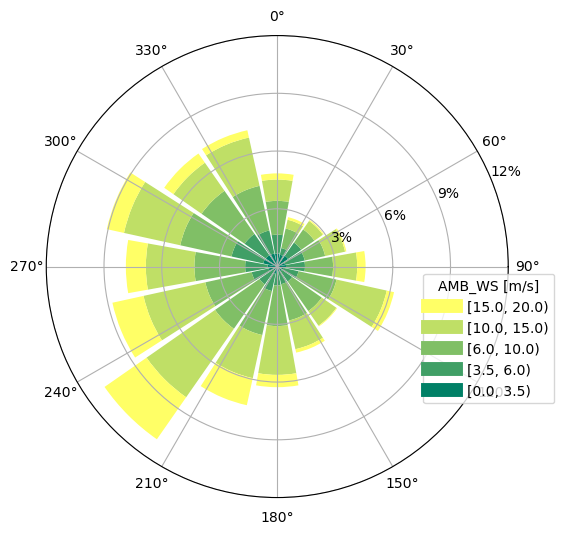

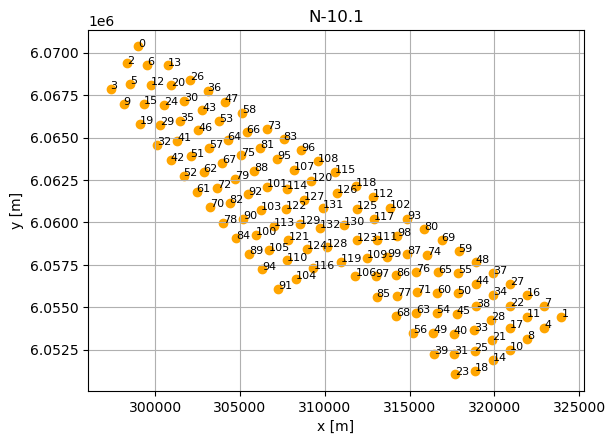

DefaultEngine: Selecting engine 'process'
ProcessEngine: Calculating 8760 states for 133 turbines
ProcessEngine: Computing 12 chunks using 12 processes


100%|██████████| 12/12 [01:04<00:00,  5.36s/it]


DefaultEngine: Selecting engine 'process'
ProcessEngine: Calculating 8760 states for 133 turbines
ProcessEngine: Computing 12 chunks using 12 processes


100%|██████████| 12/12 [01:01<00:00,  5.11s/it]


Capacity added to farm results
Ambient capacity added to farm results
Efficiency added to farm results
      Ambient Yield [GWh]  Net Yield     [GWh]  Efficiency         
T0              24.755557            24.101155             0.973565
T1              24.755557            24.028297             0.970622
T2              24.755557            24.024398             0.970465
T3              24.755557            24.261753             0.980053
T4              24.755557            23.714143             0.957932
...                   ...                  ...                  ...
T128            24.755557            23.274699             0.940181
T129            24.755557            23.074191             0.932081
T130            24.755557            23.190648             0.936786
T131            24.755557            23.117964             0.933849
T132            24.755557            23.040115             0.930705

[133 rows x 3 columns]
{'farm_ambient_power_MW': np.float64(375.8549135178814), 

100%|██████████| 12/12 [01:02<00:00,  5.22s/it]


DefaultEngine: Selecting engine 'process'
ProcessEngine: Calculating 8760 states for 133 turbines
ProcessEngine: Computing 12 chunks using 12 processes


100%|██████████| 12/12 [01:08<00:00,  5.70s/it]


Capacity added to farm results
Ambient capacity added to farm results
Efficiency added to farm results
Farm ambient power [MW]: 795.9
Farm net power     [MW]: 720.8
Farm efficiency        : 0.906
Annual yield      [GWh]: 6313.87

Sample turbine efficiencies:
T0    0.954850
T1    0.949093
T2    0.912777
T3    0.924945
T4    0.916106
Name: Efficiency         , dtype: float64


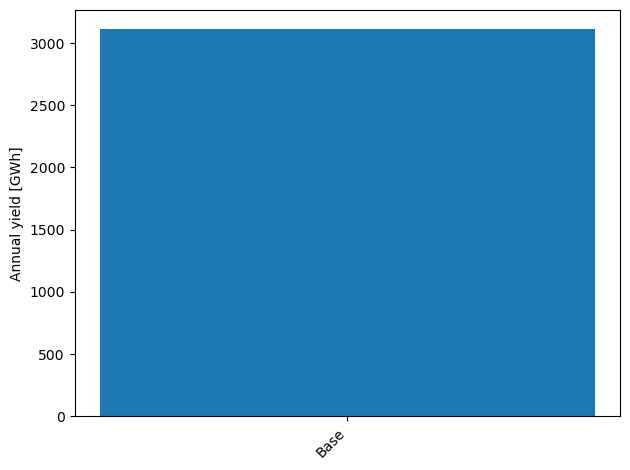


=== Running wake models: ['Jensen_linear_k004', 'IECTI2019k_linear_k004'] ===
Turbine 0, T0: xy=(299005.80, 6070368.13), DTU10MW
Turbine 1, T1: xy=(298349.95, 6069364.01), DTU10MW
Turbine 2, T2: xy=(299546.60, 6069298.19), DTU10MW
Turbine 3, T3: xy=(300744.40, 6069255.93), DTU10MW
Turbine 4, T4: xy=(302075.57, 6068404.37), DTU10MW
Turbine 5, T5: xy=(298529.18, 6068179.05), DTU10MW
Turbine 6, T6: xy=(299725.82, 6068113.23), DTU10MW
Turbine 7, T7: xy=(300923.62, 6068070.97), DTU10MW
Turbine 8, T8: xy=(297371.96, 6067866.68), DTU10MW
Turbine 9, T9: xy=(303085.54, 6067758.28), DTU10MW
Turbine 10, T10: xy=(301715.50, 6067171.26), DTU10MW
Turbine 11, T11: xy=(304095.51, 6067112.19), DTU10MW
Turbine 12, T12: xy=(299341.24, 6066978.00), DTU10MW
Turbine 13, T13: xy=(298142.83, 6066947.93), DTU10MW
Turbine 14, T14: xy=(300539.04, 6066935.73), DTU10MW
Turbine 15, T15: xy=(302771.25, 6066601.55), DTU10MW
Turbine 16, T16: xy=(305105.47, 6066466.11), DTU10MW
Turbine 17, T17: xy=(301478.71, 6065995.

100%|██████████| 12/12 [00:15<00:00,  1.26s/it]


DefaultEngine: Selecting engine 'process'
ProcessEngine: Calculating 8760 states for 133 turbines
ProcessEngine: Computing 12 chunks using 12 processes


100%|██████████| 12/12 [00:14<00:00,  1.19s/it]


Capacity added to farm results
Ambient capacity added to farm results
Efficiency added to farm results
Farm ambient power [MW]: 795.9
Farm net power     [MW]: 681.5
Farm efficiency        : 0.856
Annual yield      [GWh]: 5969.92

Sample turbine efficiencies:
T0    0.929409
T1    0.925311
T2    0.887687
T3    0.890281
T4    0.875484
Name: Efficiency         , dtype: float64


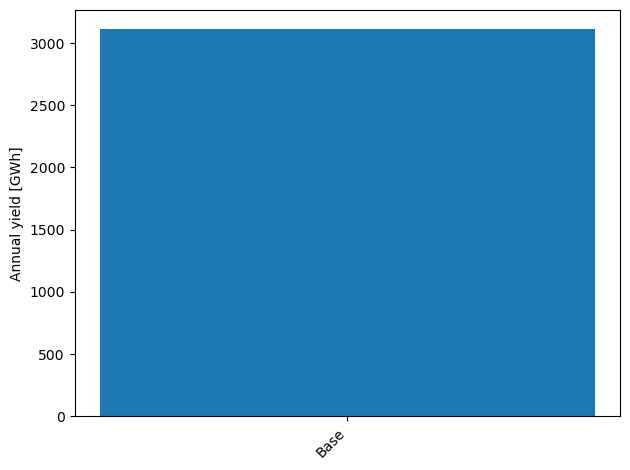

In [3]:
import numpy as np
import pandas as pd
import customFunctions as fct
import matplotlib.pyplot as plt
import foxes
import foxes.variables as FV
import foxes.input.farm_layout as layout
from foxes import algorithms
from foxes.output import FarmResultsEval
import os
os.environ["FOXES_ENGINE"]    = "threads"
os.environ["FOXES_N_PROCS"]   = "1"

# 1) Load & prepare ERA5 from reanalysis.csv
print("TASK 4:")
era5 = pd.read_csv("reanalysis.csv", index_col=0, parse_dates=True)
era5.rename(columns={"WS100":"WS","WD100":"WD"}, inplace=True)
era5.replace(-999, np.nan, inplace=True)
era5 = era5.resample("h").mean()
era5.index = pd.to_datetime(era5.index)
era5 = era5.loc["2006-01-01":"2006-12-31"]

# 2) Ensure turbulence intensity column exists
if "TI" not in era5.columns:
    era5["TI"] = 0.10  

# 3) Build FOXES TimeSeries states using the cleaned WS/WD
states = foxes.input.states.Timeseries(
    data_source=era5,
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col={FV.WS: "WS", FV.WD: "WD", FV.TI: "TI"},
    fixed_vars={FV.RHO: 1.225},
)

# plot windrose 
o = foxes.output.StatesRosePlotOutput(states, point=[0.0, 0.0, 100.0])
o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
plt.show()

# 4) Create the wind farm layout for N-10.1
farm = foxes.WindFarm(name="N-10.1")

layout_data = pd.read_csv(
    "turbine-info/coordinates/area_of_interest/layout-N-10.1.geom.csv",
    index_col=None
)
# add turbines using NREL5MW model
layout.add_from_csv(
    farm,
    layout_data,
    turbine_models=["NREL5MW"],
    verbosity=0
)

# 5) Set up & run FOXES (internal wake only)
algo = algorithms.Downwind(
    farm,
    states,
    rotor_model="centre",
    wake_models=["Bastankhah2014_quadratic_ka02"],
    verbosity=0
)
# Display windfarm layout 
foxes.output.FarmLayoutOutput(farm).get_figure()
plt.show()

results = algo.calc_farm(
    calc_parameters={"chunk_size_states": 1000}
)

# 6) Aggregate results & compute yield 
from customFunctions import compute_yield

turbine_stats, summary = compute_yield(algo)

print(turbine_stats)
print(summary)
base_yield = summary["annual_yield_GWh"]
yield_labels = ["Base"]
yield_values = [base_yield]

# %% 7) TASK 5 via setup_windfarm

from customFunctions import setup_algo, compute_yield
print("TASK 5:")

# Define the two sets of wake models to compare
wake_sets = [
    ["Bastankhah2014_quadratic_ka02", "CrespoHernandez_max_ka04"],
    ["Jensen_linear_k004",              "IECTI2019k_linear_k004"]
]


for wakes in wake_sets:
    print(f"\n=== Running wake models: {wakes} ===")
    
    # Re-use the same cleaned ERA5 DataFrame `era5` from above
    # setup_windfarm now returns (farm, algo)
    algo7 = setup_algo(
    wind_data    = era5,
    windfarm_name= "N-10.1",
    TI           = 0.10,
    RHO          = 1.225,
    wake_models  = wakes,
    model_book   = None
)

    
    # Run the calculation in chunks
    results7 = algo7.calc_farm(
        calc_parameters={"chunk_size_states": 1000}
    )
    
    # Compute per‐turbine stats & farm summary
    stats7, summary7 = compute_yield(algo7)
    
    # Print farm‐level metrics
    print(f"Farm ambient power [MW]: {summary7['farm_ambient_power_MW']:.1f}")
    print(f"Farm net power     [MW]: {summary7['farm_net_power_MW']:.1f}")
    print(f"Farm efficiency        : {summary7['farm_efficiency']:.3f}")
    print(f"Annual yield      [GWh]: {summary7['annual_yield_GWh']:.2f}\n")
    
    # Show the first 5 turbine efficiencies
    print("Sample turbine efficiencies:")
    print(stats7["Efficiency         "].head(5))

    plt.bar(range(len(yield_values)), yield_values)
    plt.xticks(range(len(yield_labels)), yield_labels, rotation=45, ha="right")
    plt.ylabel("Annual yield [GWh]")
    plt.tight_layout()
    plt.show()
